#### Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

In [1]:
#Import all required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set()
%matplotlib inline



In [2]:
#Load Data Set
df_custtomer_service_req = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Check first 5 records
df_custtomer_service_req.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# Data set or column info
df_custtomer_service_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
df_custtomer_service_req.shape

(300698, 53)

#### Data set having Total 300698 records with 53 columns 

In [6]:
df_custtomer_service_req['Closed Date'] = pd.to_datetime(df_custtomer_service_req['Closed Date'])
#Convert Closed date to datetime


In [7]:
df_custtomer_service_req['Created Date'] = pd.to_datetime(df_custtomer_service_req['Created Date'])
#Convert Created date to datetime

In [8]:
df_custtomer_service_req['Request_Closing_Time'] =  (df_custtomer_service_req['Closed Date'] - df_custtomer_service_req['Created Date']).dt.seconds/60
#Calculate request closing time 

In [9]:
df_custtomer_service_req['Request_Closing_Time']

0          55.250000
1          86.266667
2         291.516667
3         465.233333
4         207.033333
             ...    
300693           NaN
300694    120.516667
300695    187.283333
300696    245.550000
300697    248.816667
Name: Request_Closing_Time, Length: 300698, dtype: float64

In [10]:
df_custtomer_service_req.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.033333


#### Remove first 3 columns(Unique Key,Created Date,Closed Date) which not require for analysis 

In [23]:
df_custtomer_service_req = df_custtomer_service_req.iloc[:,3:]

In [11]:
#check updated shape
df_custtomer_service_req.shape

(300698, 54)

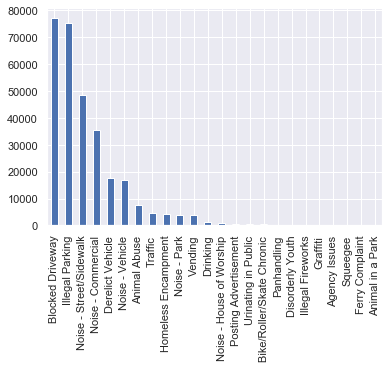

In [12]:
df_custtomer_service_req['Complaint Type'].value_counts().plot.bar()

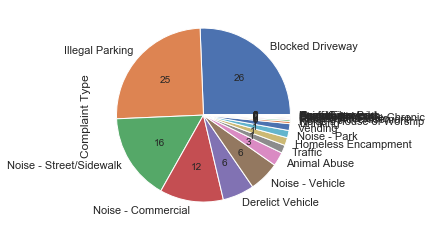

In [13]:
df_custtomer_service_req['Complaint Type'].value_counts().plot.pie(autopct='%.f')

#### Blocked Driveway is most raised of compaint type & Animal in Park is least

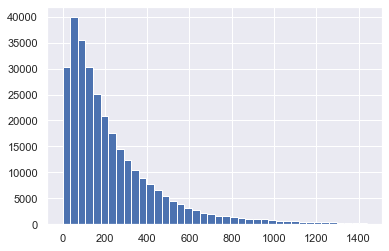

In [14]:
df_custtomer_service_req['Request_Closing_Time'].hist(bins=40)

In [15]:
df_custtomer_service_req['Request_Closing_Time'].mean()

235.76379731175177

In [16]:
df_custtomer_service_req['Request_Closing_Time'].median()

161.3

In [18]:
grouped = df_custtomer_service_req[].groupby(['City','Complaint Type'])['Request_Closing_Time'].nlargest()

In [26]:
df_custtomer_service_req.sort_values(['Complaint Type','Request_Closing_Time'],ascending=False).groupby('City').head(3)

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
263500,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,11208.0,1170 LIBERTY AVENUE,LIBERTY AVENUE,GRANT AVENUE,ELDERT LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.678852,-73.865976,"(40.678852198664316, -73.8659762145188)",1430.000000
255897,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,10011.0,374 6 AVENUE,6 AVENUE,WASHINGTON PLACE,WAVERLY PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.732785,-74.000159,"(40.732785272158175, -74.00015876196325)",1427.333333
236484,NYPD,New York City Police Department,Vending,In Prohibited Area,Street/Sidewalk,11109.0,46-30 CENTER BOULEVARD,CENTER BOULEVARD,46 ROAD,47 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.746655,-73.956508,"(40.746654525427516, -73.95650820907728)",1403.050000
236467,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,11109.0,46-30 CENTER BOULEVARD,CENTER BOULEVARD,46 ROAD,47 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.746655,-73.956508,"(40.746654525427516, -73.95650820907728)",1392.333333
56641,NYPD,New York City Police Department,Vending,In Prohibited Area,Street/Sidewalk,10466.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.900836,-73.846718,"(40.90083595022644, -73.84671835790932)",1386.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125513,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11040.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.746929,-73.701496,"(40.746929178463, -73.70149604484601)",1169.000000
281251,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11370.0,19-88 78 STREET,78 STREET,19 DRIVE,21 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.771631,-73.892080,"(40.77163053809953, -73.8920799549057)",718.916667
281150,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11370.0,19-42 75 STREET,75 STREET,20 AVENUE,21 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.771457,-73.894900,"(40.77145748140058, -73.89489989870981)",634.166667
226634,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11370.0,19-32 75 STREET,75 STREET,20 AVENUE,21 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.771468,-73.894903,"(40.77146846364193, -73.89490349170275)",586.000000


City     Complaint Type        
ARVERNE  Animal Abuse    102846    388.183333
                         131095    301.583333
                         126001    221.000000
                         191012    212.000000
                         130809    210.883333
Name: Request_Closing_Time, dtype: float64

##### On average 235.76 miutes(4.21 hrs) is request closing time

In [70]:
df_custtomer_service_req['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [27]:
df_custtomer_service_req['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [63]:
#### Format Cities with short name and unique. Data set having same city with all capital or Camel case.Python is casesesitive

In [30]:
city_short_name = {"NEW YORK":"NY",
                         "ASTORIA":"AST",
                         "BRONX":"BRX",
                         "ELMHURST":"ELM",
                         "BROOKLYN":"BKY",
                  "KEW GARDENS":"KGRD",
                  "JACKSON HEIGHTS":"JKH",
                  "MIDDLE VILLAGE":"MVLG",
                  "REGO PARK":"RGP",
                  "SAINT ALBANS":"SALB",
                  "JAMAICA":"JMC",
                  "SOUTH RICHMOND HILL":"SRHILL",
                  "RIDGEWOOD":"RGWOOD",
                  "HOWARD BEACH":"H-BEACH",
                  "FOREST HILLS":"H-HILLS",
                  "STATEN ISLAND":"S-ILD",
                  "OZONE PARK":"OZ-PARK",
                  'RICHMOND HILL':"RCH-HILL", 'WOODHAVEN':'W-HAVEN', 'FLUSHING':'FLS', 'CORONA':'CORONA',
       'QUEENS VILLAGE':'Q-VLG', 'OAKLAND GARDENS':"OKL-GRD", 'HOLLIS':"HOLLIS", 'MASPETH':'MASPETH',
       'EAST ELMHURST':"E-ELS", 'SOUTH OZONE PARK':"S-OZ-PRK", 'WOODSIDE':'W-SIDE', 'FRESH MEADOWS':"FRS-MDOW",
       'LONG ISLAND CITY':"LIC", 'ROCKAWAY PARK':'RC-PARK', 'SPRINGFIELD GARDENS':"SPR-GRD",
       'COLLEGE POINT':'CLG-PNT', 'BAYSIDE':'B-SIDE', 'GLEN OAKS':"G-OKS", 'FAR ROCKAWAY':'F-RKW',
       'BELLEROSE':'B-ROSE', 'LITTLE NECK':'L-NECK', 'CAMBRIA HEIGHTS':'CBR-HEIG', 'ROSEDALE':'R-DALE',
       'SUNNYSIDE':'S-SIDE', 'WHITESTONE':'W-STN', 'ARVERNE':'ARVERNE', 'FLORAL PARK':'FLR-PRK',
       'NEW HYDE PARK':'NHP', 'CENTRAL PARK':'CP', 'BREEZY POINT':'BRZ-PNT', 'QUEENS':'QEENS',
       'Astoria':'AST', 'Long Island City':'LIC', 'Woodside':'W-SIDE', 'East Elmhurst':"E-ELS",
       'Howard Beach':"H-BEACH"}

In [ ]:
df_custtomer_service_req['City'] = df_custtomer_service_req["City"].map(city_short_name)

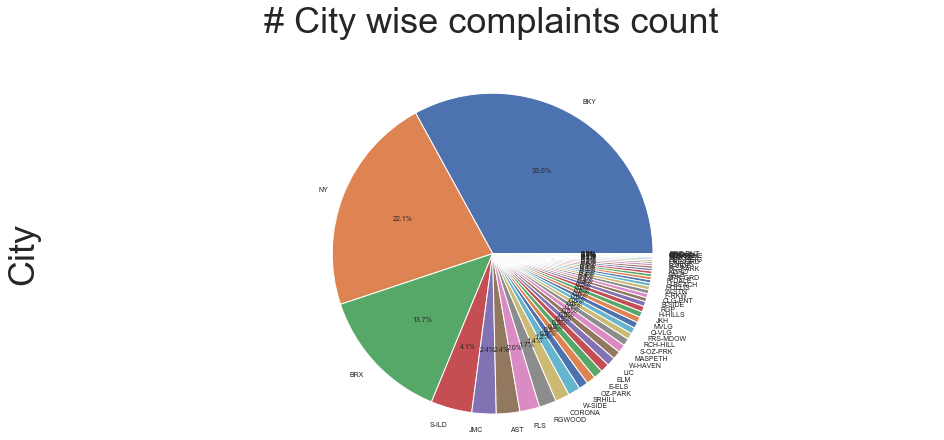

In [69]:
df_custtomer_service_req.City.value_counts().plot(kind='pie',autopct='%1.1f%%',
                        #explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (14,7),fontsize=7)
plt.axis('equal')
plt.title('# City wise complaints count\n')
plt.tight_layout()
plt.show()




In [31]:
df_custtomer_service_req['City'] = df_custtomer_service_req["City"].map(city_short_name)

##### BROOKLYN city having most number of complaints/request 

In [33]:
df_custtomer_service_req['Agency Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

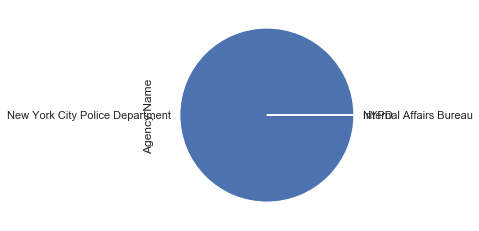

In [34]:
df_custtomer_service_req['Agency Name'].value_counts().plot.pie()

In [35]:
df_custtomer_service_req.isnull().sum()

Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough                                0
X Coordinate (State Plane)          3540
Y Coordinate (State Plane)          3540
Park Facility Na

### Drop less impacting columns
- Columns with all null values or more than 90% null values are less impacting on data analysis.

In [36]:
drop_columns=['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark']

In [37]:
df_custtomer_service_req = df_custtomer_service_req.drop(drop_columns, axis=1)

In [38]:
df_custtomer_service_req.shape

(300698, 39)

In [39]:
df_custtomer_service_req.isnull().sum()

Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough                                0
X Coordinate (State Plane)          3540
Y Coordinate (State Plane)          3540
Park Facility Name                     0
Park Borough    

In [40]:
df_custtomer_service_req['Facility Type'].unique()

array(['Precinct', nan], dtype=object)

In [41]:
df_custtomer_service_req['Status'].unique()

array(['Closed', 'Open', 'Assigned', 'Draft'], dtype=object)

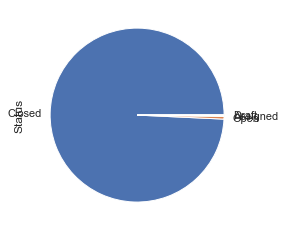

In [42]:
df_custtomer_service_req['Status'].value_counts().plot.pie()

In [53]:
df_custtomer_service_req['Location'].unique()

array(['(40.86568153633767, -73.92350095571744)',
       '(40.775945312321085, -73.91509393898605)',
       '(40.870324522111424, -73.88852464418646)', ...,
       '(40.77664591586459, -73.94880525662063)',
       '(40.70635259429073, -73.8712445609601)',
       '(40.71605290789855, -73.99137850370803)'], dtype=object)

In [47]:
cat_cols = ['City','Complaint Type','Status']
target = 'Request_Closing_Time'

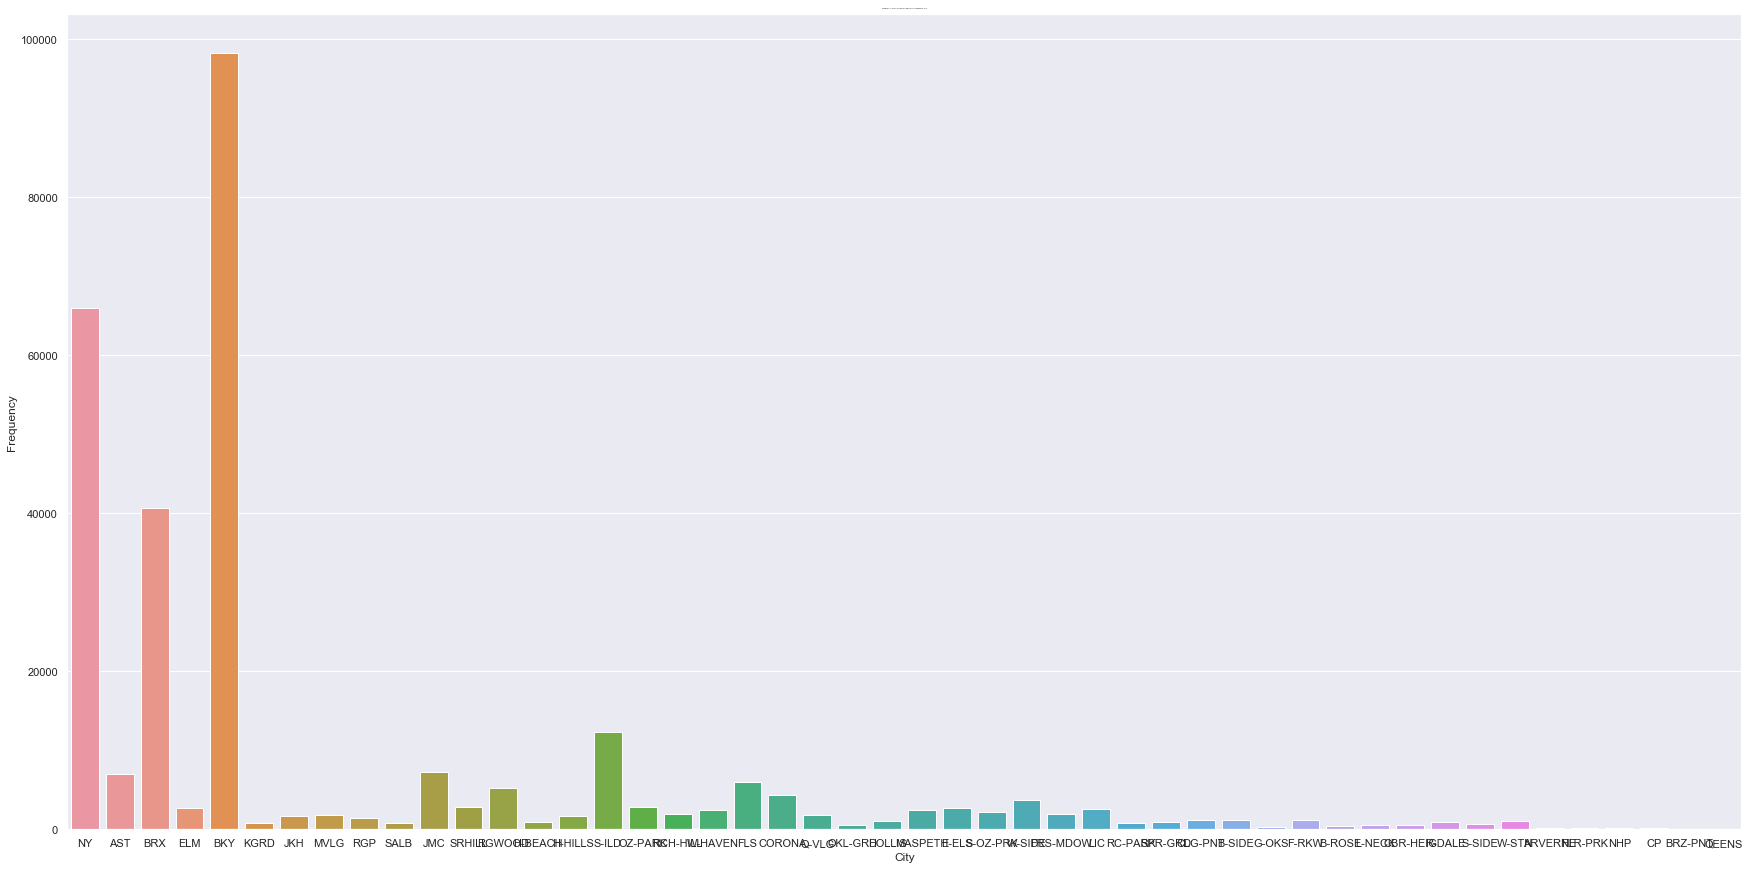

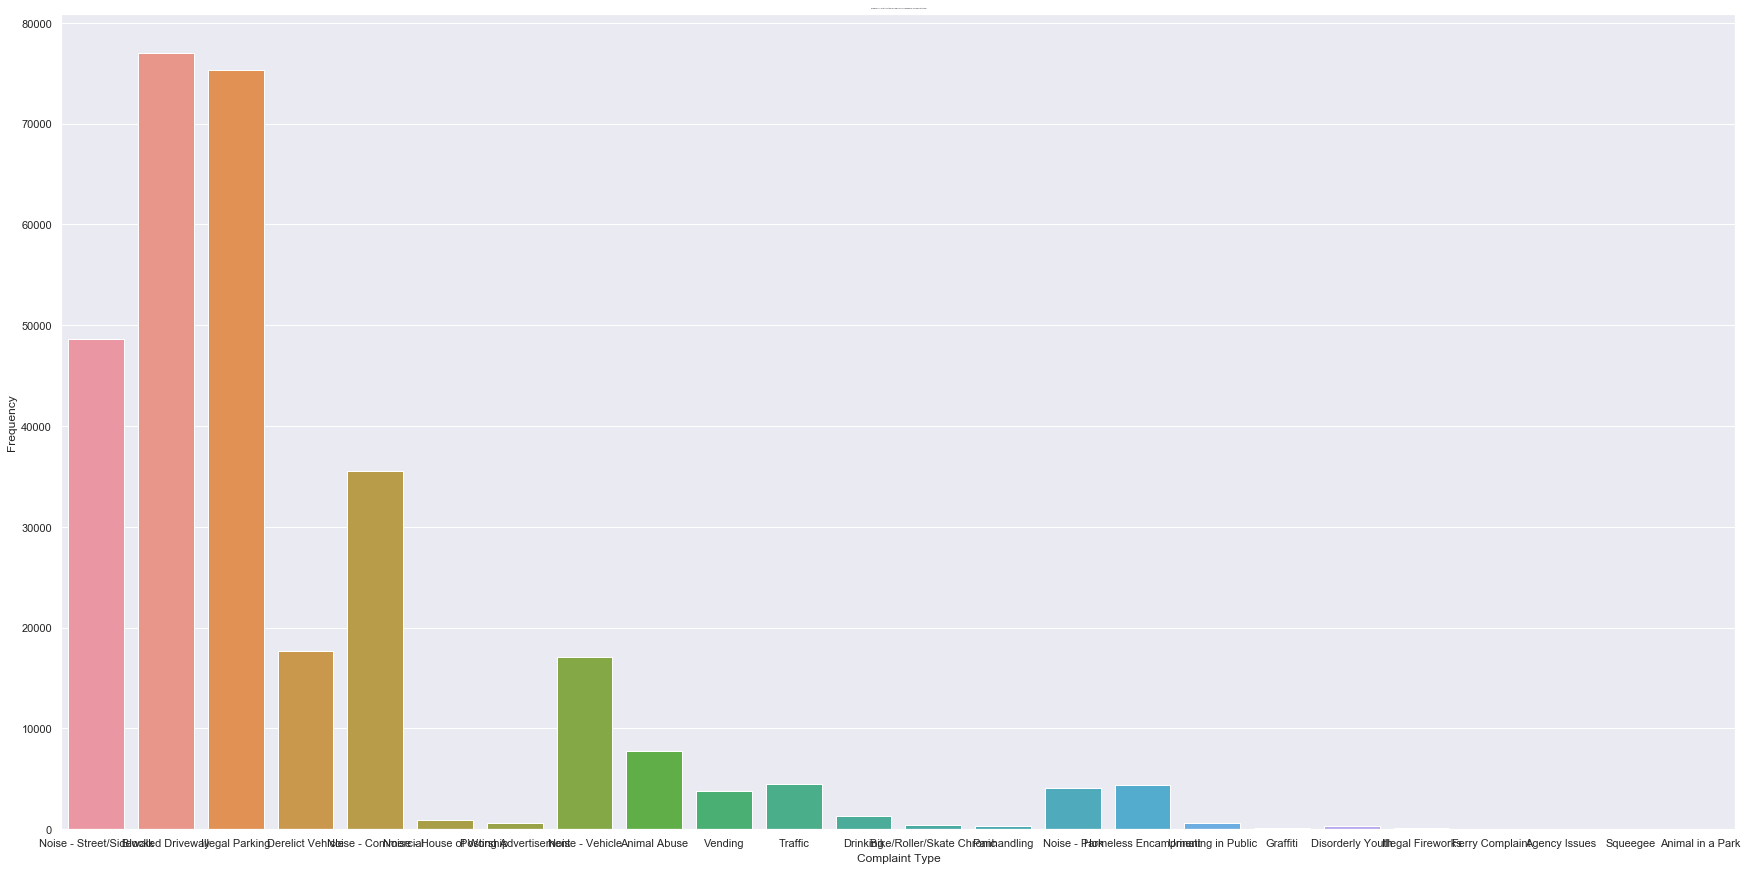

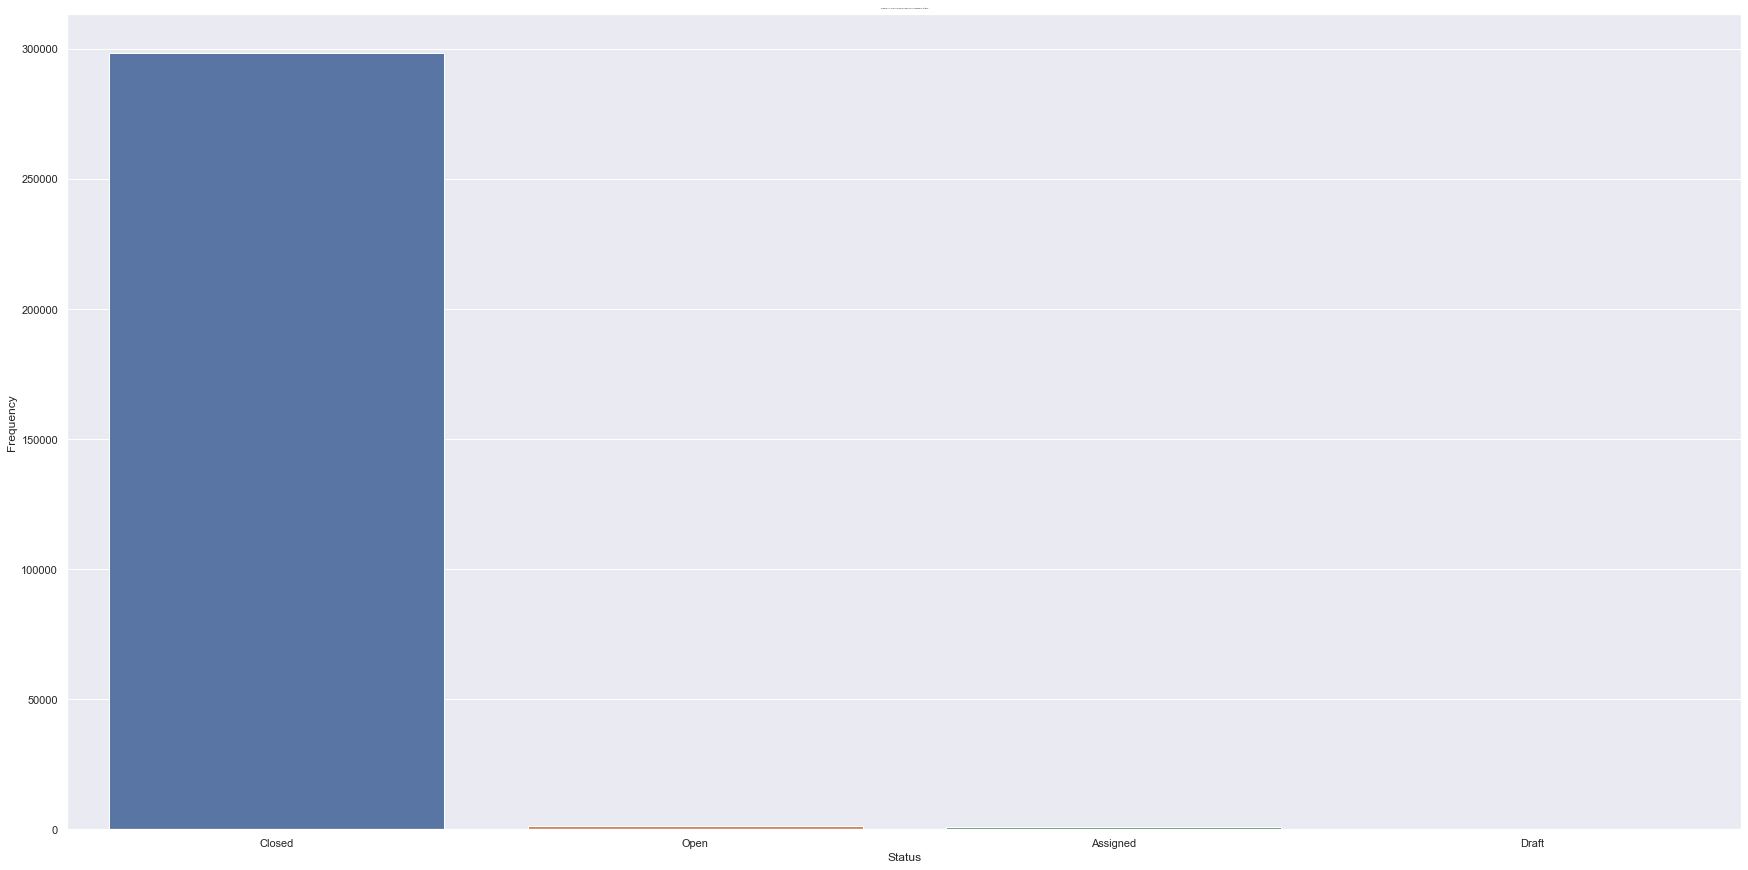

In [44]:
for cat_col in cat_cols:
    fig = plt.figure(figsize = (30,15))
    ax = fig.add_subplot(111)
    sns.countplot(x = cat_col,
                  data = df_custtomer_service_req,
                  ax = ax)
    ax.set_xlabel(cat_col)
    ax.set_ylabel("Frequency")
    ax.set_title('Frequency Distribution for individual classes in {}'.format(cat_col), fontsize = 2)

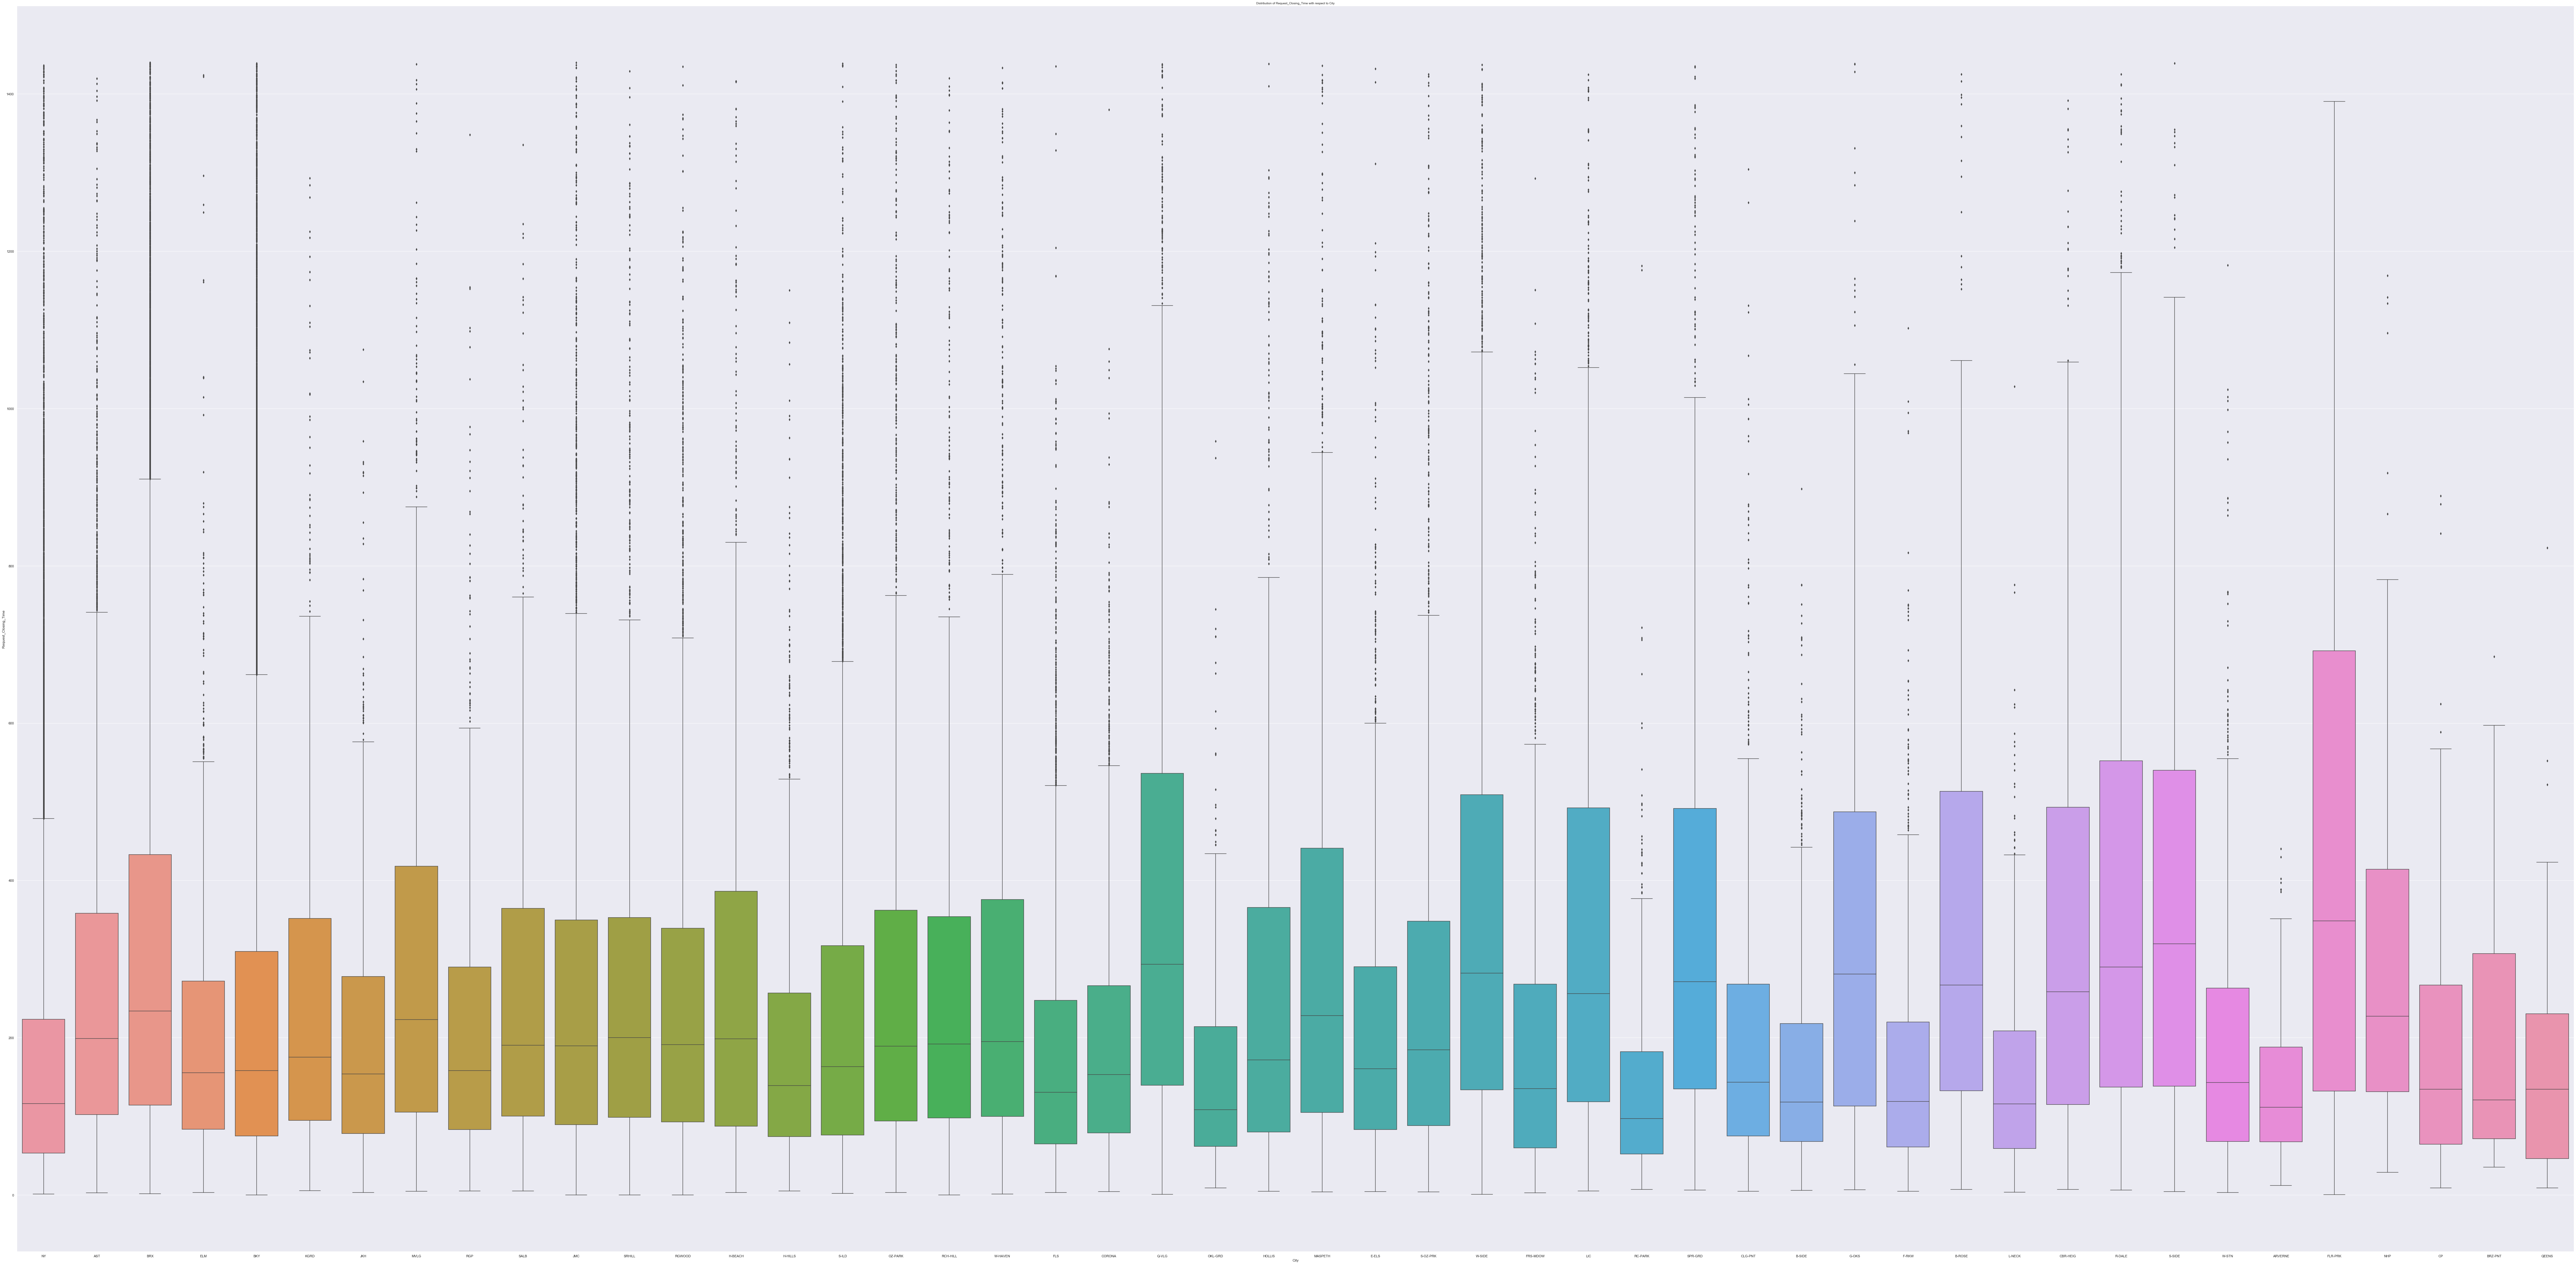

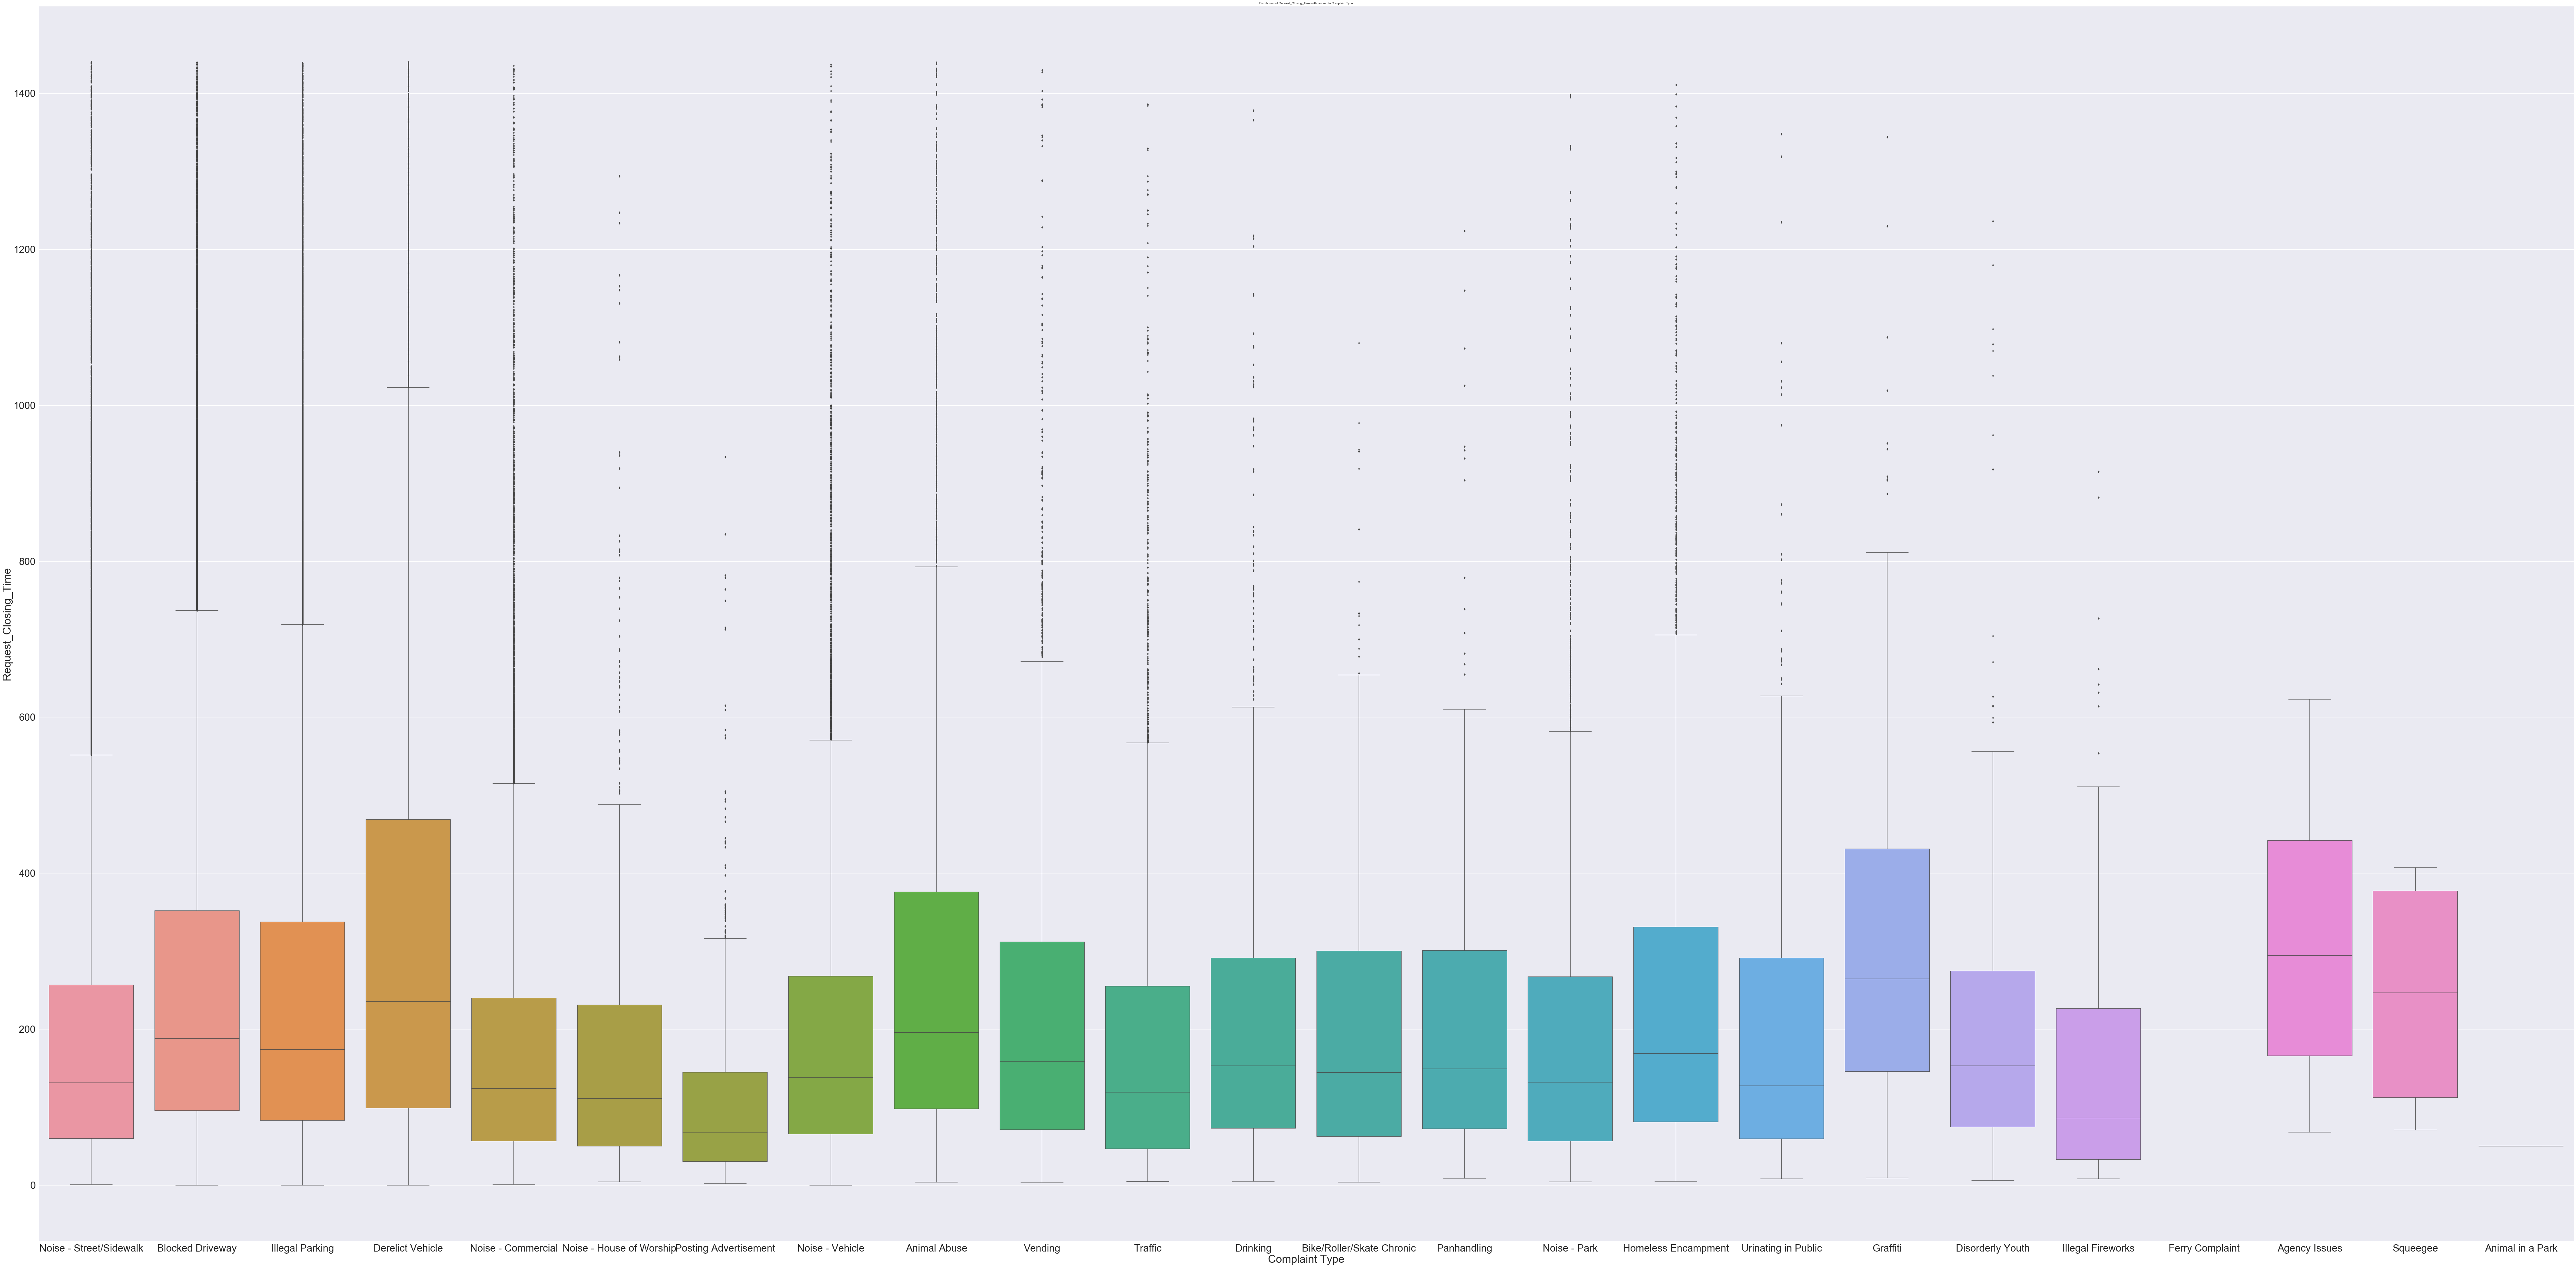

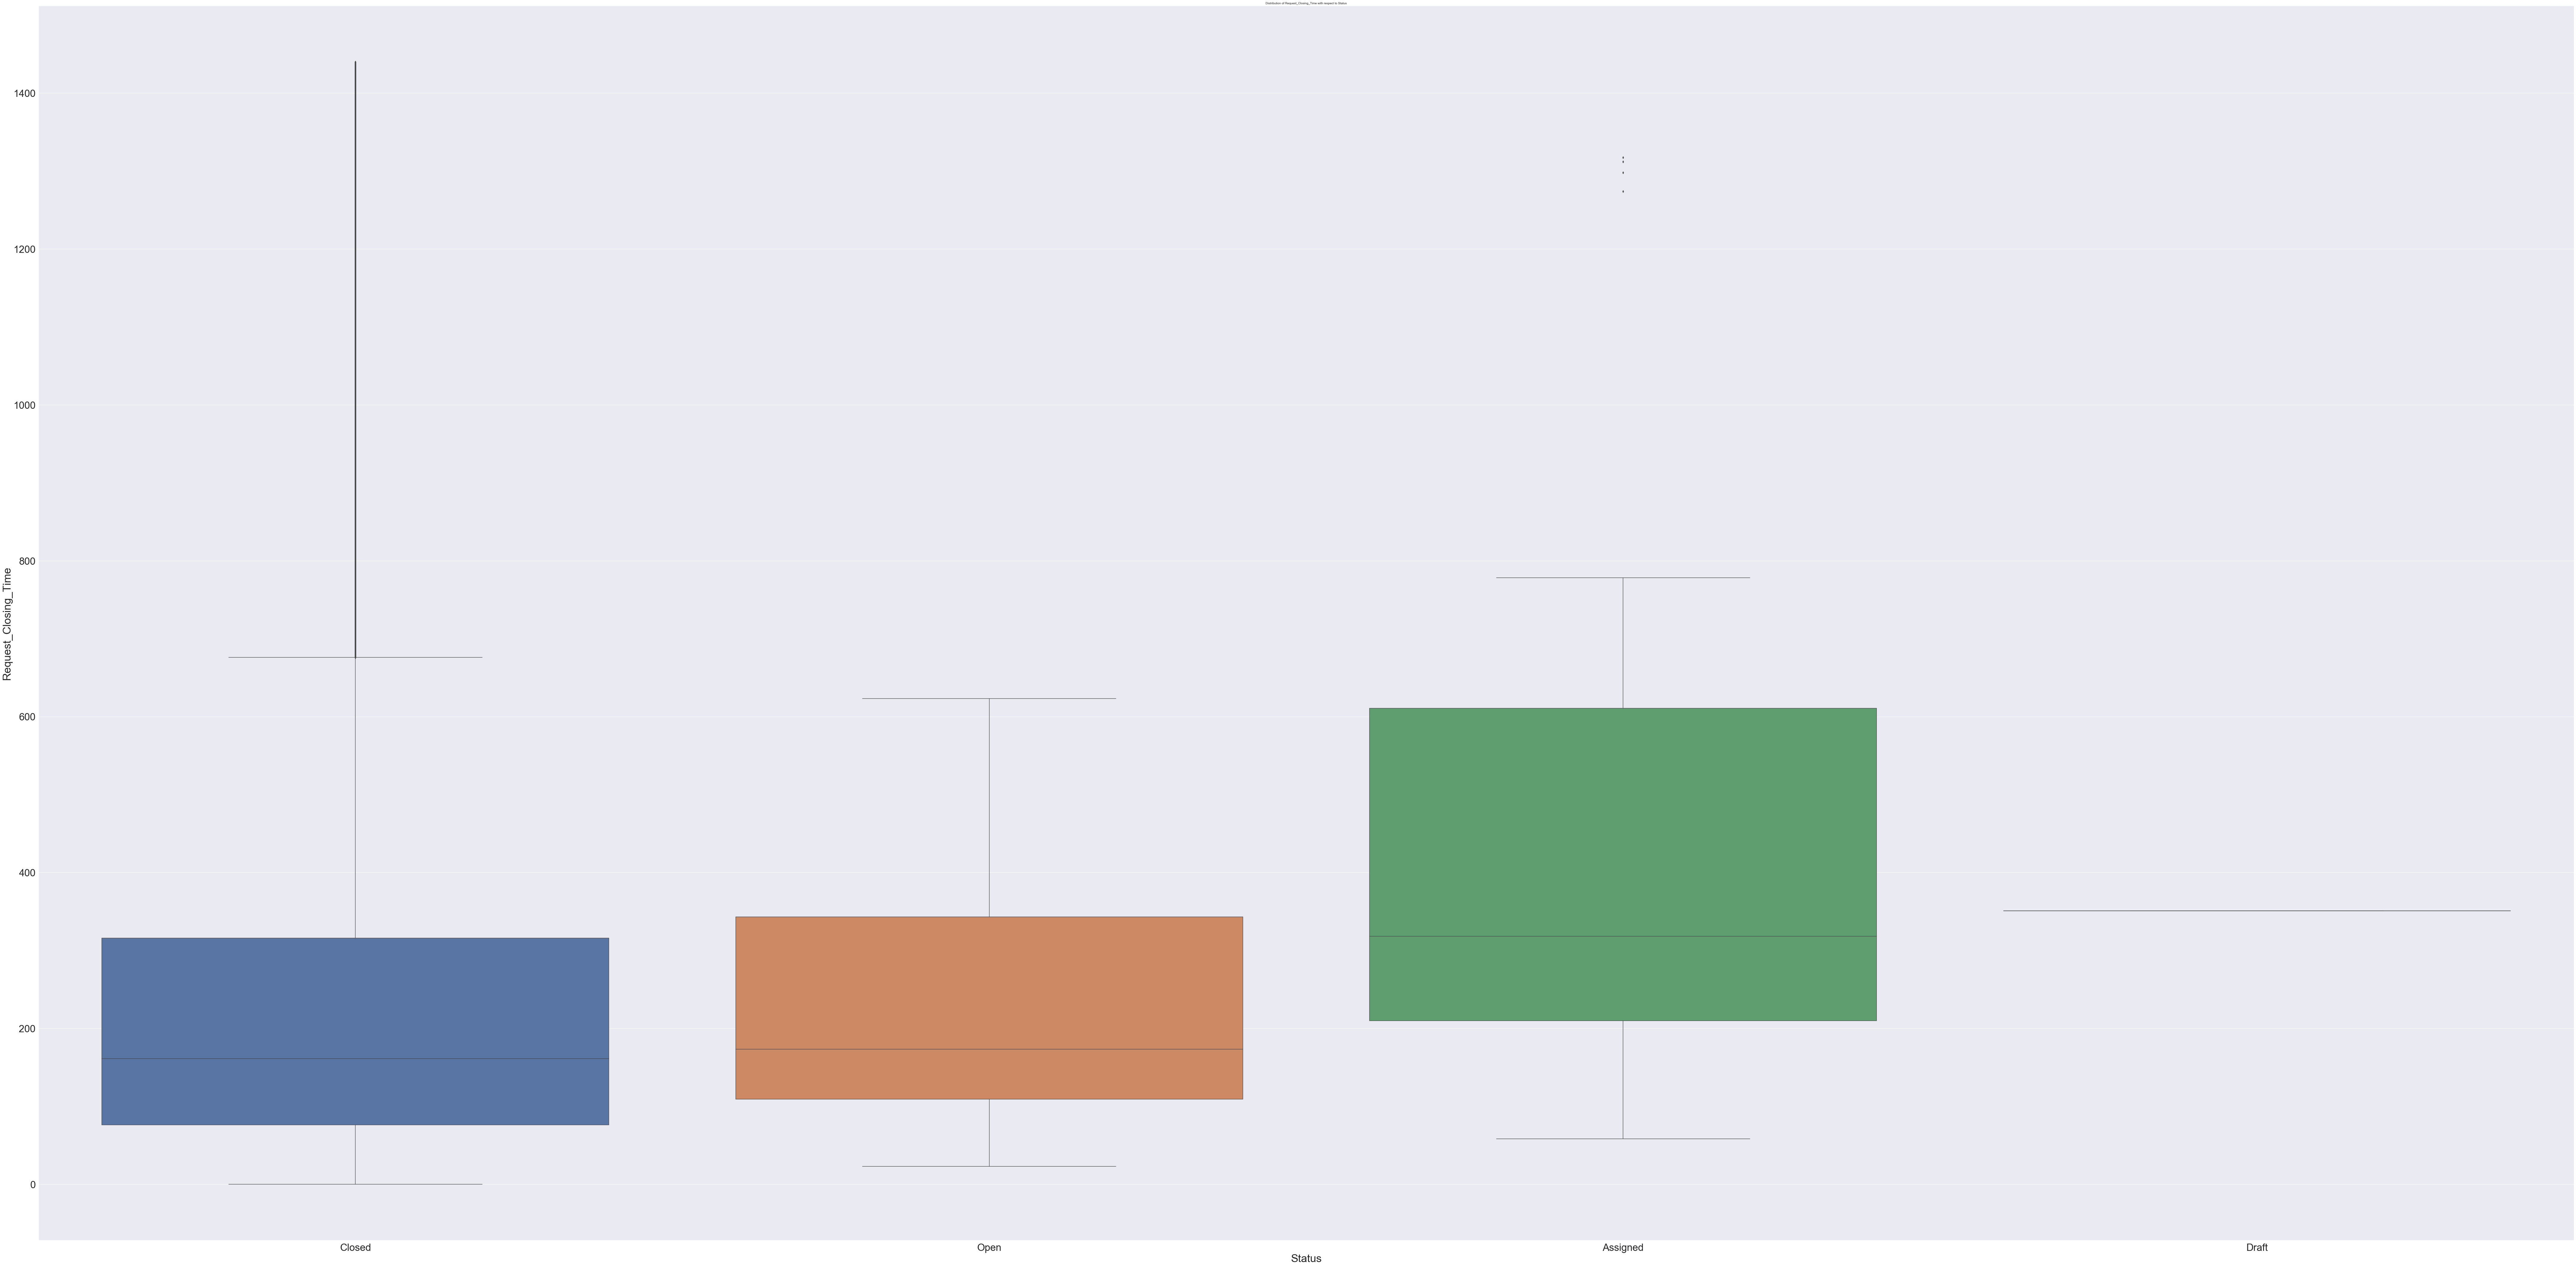

In [45]:
for cat_col in cat_cols:
    fig = plt.figure(figsize = (150,75))
    ax = fig.add_subplot(111)
    sns.set(font_scale = 3)
    sns.boxplot(y = target,
                x = cat_col,
                data = df_custtomer_service_req, 
                ax = ax)
    ax.set_xlabel(cat_col)
    ax.set_ylabel(target)
    ax.set_title('Distribution of {} with respect to {}'.format(target,cat_col), fontsize = 10)

### Observations : -
- 50% of service requests are type of Illegal parking and Blocked delivery 
- Highest requests are from BROOKLYN city and then Newyork
- FLORAL PARK having highest closing time.
- Derelict Vehicle service/complaint having highest closing time.